## Weather Analysis (Machine Learning K-Mean)


In [1]:
#importing libs

%matplotlib inline
from copy import deepcopy #allows copy arrays instead of using pointeurs
import numpy as np #numpy (array maths etc)
import pandas as pd #importing data from a file
from matplotlib import pyplot as plt #display
plt.rcParams['figure.figsize']=(16,9) #limit the size
plt.style.use('ggplot') #plot style

#we don't use sklearn in this exemple to show how to do without




In [2]:
#importing the dataset
data = pd.read_csv('/home/asministrateur/Bureau/NCTU/Machine_Learning/data.csv')
print(data.shape)
data.head()


(39, 2)


,Temperature Difference,Pressure difference
0,2.07,-3.240
1,17.93,15.788
2,1.08,7.319
3,11.12,14.410
4,23.71,2.560


[ 2.07  17.93   1.08  11.12  23.71  24.169 21.665  4.69  19.2    4.23
  9.127 -0.4    7.31  -3.438 17.63   4.41  11.94   0.72   8.18  -5.77
 18.769  0.1    0.11   0.12   0.13   0.11  10.    10.1   10.1   10.12
 10.13  10.14  10.12  20.    20.1   20.11  20.12  20.13  20.15 ]
[ -3.24   15.788   7.319  14.41    2.56   32.02    4.89   12.34   -1.12
  -4.44   23.6    15.29    3.3   -12.02   -3.21   22.8     8.12    1.8
  28.13    1.02   24.17    0.1     0.09    0.11    0.1     0.11   20.
  20.     20.1    20.11   20.13   20.08   20.09    0.      0.1     0.08
   0.12    0.07    0.15 ]
[(2.07, -3.24), (17.93, 15.788), (1.08, 7.319), (11.12, 14.41), (23.71, 2.56), (24.169, 32.02), (21.665, 4.89), (4.69, 12.34), (19.2, -1.12), (4.23, -4.44), (9.127, 23.6), (-0.4, 15.29), (7.31, 3.3), (-3.438, -12.02), (17.63, -3.21), (4.41, 22.8), (11.94, 8.12), (0.72, 1.8), (8.18, 28.13), (-5.77, 1.02), (18.769000000000002, 24.17), (0.1, 0.1), (0.11, 0.09), (0.12, 0.11), (0.13, 0.1), (0.11, 0.11), (10.0, 20.0)

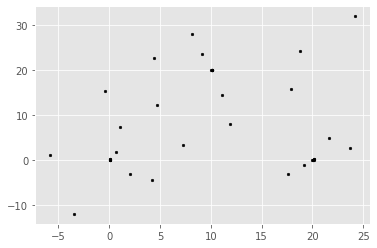

In [3]:
#Getting the values and plotting it

f1 = data['Temperature Difference'].values
print(f1)
f2 = data['Pressure difference'].values
print(f2)
print(list(zip(f1,f2)))
X = np.array(list(zip(f1,f2)))
print(X)
plt.scatter(f1,f2,c='black',s=7)

In [4]:
#Euclidian Distance Calculator
def dist(a,b,ax=1):
    return np.linalg.norm(a-b,axis=ax)

In [5]:
#Number of clusters
k=3

#X coordinates of random centroids
C_x=np.random.randint(0,np.max(X)-20,size=k)

#Y coordinates of random centroids
C_y = np.random.randint(0,np.max(X)-20,size=k)

C=np.array(list(zip(C_x,C_y)),dtype=np.float32)
print(C)

[[10.  7.]
 [ 0.  6.]
 [ 5. 10.]]


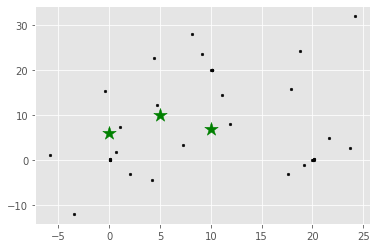

In [6]:
# Plotting along with the Centroids
plt.scatter(f1,f2,c='#050505',s=7)
plt.scatter(C_x,C_y,marker='*',s=200,c='g')

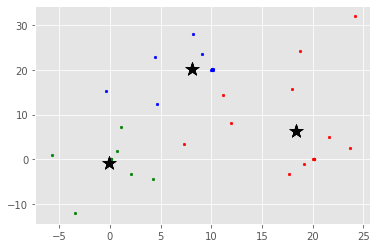

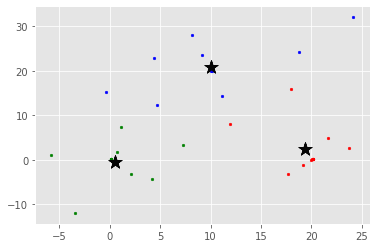

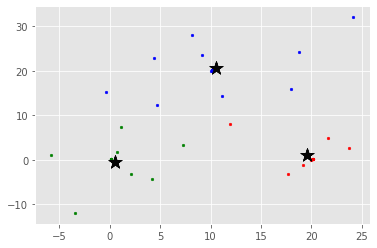

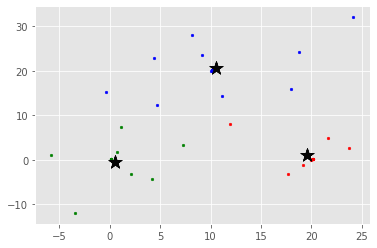

In [7]:
#To store the value of centroids when it updates
C_old = np.zeros(C.shape)

# Cluster Labels(0, 1, 2)
clusters = np.zeros(len(X))

#Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run until the error become zero
while error!=0:
    
    # Assigning each value to its closest cluster
    for i in range (len(X)):
        distances = dist(X[i],C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
        
    # Storing the old centroid values
    C_old = deepcopy(C)
    
    #Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i] #on met X[j] dans points si son cluster est i
        C[i] = np.mean(points, axis=0)
        error=dist(C, C_old, None)
        
    colors = ['r','g','b','y','c','m']
    fig, ax = plt.subplots()
    
    for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j]==i])
        ax.scatter(points[:,0],points[:,1],s=7,c=colors[i])
        ax.scatter(C[:,0],C[:,1],marker='*',s=200,c='#050505')